# Final Assignment: Exploratory Data Analysis

## Imports

In [252]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

SEED = 0
np.random.seed(SEED)
sns.set_theme()

## Read the data

In [132]:
df = pd.read_csv("Audible_Dataset_final.csv")

In [133]:
df.head()

,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,Review 1,Review 2,Review 3,Review 4,Review 5,Review 6,Review 7,Review 8,Review 9,Review 10,Review 11,Review 12,Review 13,Review 14,Review 15,Review 16,Review 17,Review 18,Review 19,Review 20,Review 21,Review 22,Review 23,Review 24,Review 25,Review 26,Review 27,Review 28,Review 29,Review 30,Review 31,Review 32,Review 33,Review 34,Review 35,Review 36,Review 37,Review 38,Review 39,Review 40,Review 41,Review 42,Review 43,Review 44,Review 45,Review 46,Review 47,Review 48,Review 49,Review 50,Review 51,Review 52,Review 53,Review 54,Review 55,Review 56,Review 57,Review 58,Review 59,Review 60,Review 61,Review 62,Review 63,Review 64,Review 65,Review 66,Review 67,Review 68,Review 69,Review 70,Review 71,Review 72,Review 73,Review 74,Review 75,Review 76,Review 77,Review 78,Review 79,Review 80,Review 81,Review 82,Review 83,Review 84,Review 85,Review 86,Review 87,Review 88,Review 89,Review 90,Review 91,Review 92,Review 93,Review 94,Review 95,Review 96,Review 97,Review 98,Review 99,Review100
0,Bamboozled by Jesus,How God Tricked Me into the Life of My Dreams,Yvonne Orji,Yvonne Orji,6 hrs and 31 mins,Unabridged Audiobook,Biographies & Memoirs,5,47.0,$29.65,Thank you for being obedient and sharing your ...,This book was amazing. What made it amazing wa...,The narration of the book by the author was a ...,I'm sending Yvonne a tilth because this was th...,Yvonne is truly amazing at blending scripture ...,I enjoyed this book immensely. Thank you for m...,This book really blessed my life. I pray that ...,I have enjoyed Yvonnes work on Insecure and he...,"to quote my wife ""I feel so seen!"" Yvonne must...",This content was amazing and being a fan of Yv...,Already surrendered my life to Jesus but this!...,I loved this book. I finished it in 2 days. I ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sixth Realm Part 1,"A LitRPG Fantasy Series (The Ten Realms, Book 6)",Michael Chatfield,Neil Hellegers,13 hrs and 33 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.5,98.0,$24.95,My brother and I have been listening to this s...,The narrator change takes away some of the per...,I know some people will have a problem with th...,I am absolutely blown away at how amazing this...,Great story and narration!Rugrat and Eric are ...,"Things happened, the narrator changed. Its not...",keep up the great work team! you're doing grea...,While i woulda liked the old narrator to stay ...,I am only in the first chapter and am having t...,the story is great as usual but I won't be buy...,"The story line is great, but the voice acting ...",the story is still amazing and neil is an amaz...,I have to say that this is one of my favorite ...,I don't like the new narration choice. It chan...,Loved it I can't wate for the next book. The n...,great story. an amazing continuation to the se...,I know a narrator change can be hard to get us...,door is good as always just takes a little get...,"To be clear, if the narrator were on a differe...",I'll be patiently waiting for the next part an...,Neil Hellegers did a fine enough job of narrat...,The new narrator has basically no range and al...,Is with this audiobook some things change such...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Go Tell the Bees That I Am Gone,"Outlander, Book 9",Diana Gabaldon,Davina Porter,27 hrs and 30 mins,Unabrid

In [134]:
df.shape

(2269, 110)

In [135]:
df.columns

Index(['Book Title', 'Book Subtitle', 'Book Author', 'Book Narrator', 'Audio Runtime', 'Audiobook_Type', 'Categories', 'Rating', 'Total No. of Ratings', 'Price',
       ...
       'Review 91', 'Review 92', 'Review 93', 'Review 94', 'Review 95', 'Review 96', 'Review 97', 'Review 98', 'Review 99', 'Review100'], dtype='object', length=110)

We can see that we have 100 columns related to the reviews. To do our exploratory data analysis, these columns aren't relevent - we would use them later in ou Natural Language Processing Analysis. Thus, let's remove them for the moment, and check the missing values

In [136]:
no_review_cols = [col for col in df.columns if 'Review' not in col]
review_cols = [col for col in df.columns if 'Review' in col]

df_eda = df[no_review_cols].copy()
df_ratings = df[review_cols].copy()

nb_reviews = df_ratings.count(axis = 1).rename("No. of Reviews")

df_eda = pd.concat([df_eda, nb_reviews], axis=1)

df_eda.head()

,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,No. of Reviews
0,Bamboozled by Jesus,How God Tricked Me into the Life of My Dreams,Yvonne Orji,Yvonne Orji,6 hrs and 31 mins,Unabridged Audiobook,Biographies & Memoirs,5,47.0,$29.65,12
1,Sixth Realm Part 1,"A LitRPG Fantasy Series (The Ten Realms, Book 6)",Michael Chatfield,Neil Hellegers,13 hrs and 33 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.5,98.0,$24.95,23
2,Go Tell the Bees That I Am Gone,"Outlander, Book 9",Diana Gabaldon,Davina Porter,27 hrs and 30 mins,Unabridged Audiobook,Science Fiction & Fantasy,NaN,NaN,$41.99,0
3,How the Word Is Passed,A Reckoning with the History of Slavery Across...,Clint Smith,Clint Smith,10 hrs and 7 mins,Unabridged Audiobook,History,NaN,NaN,$29.65,0
4,The Devil May Dance,A Novel,Jake Tapper,Rob Shapiro,10 hrs and 12 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.5,108.0,$29.65,12


We can see that there are NaN Ratings. Let's see how much NaN we have in this dataset.

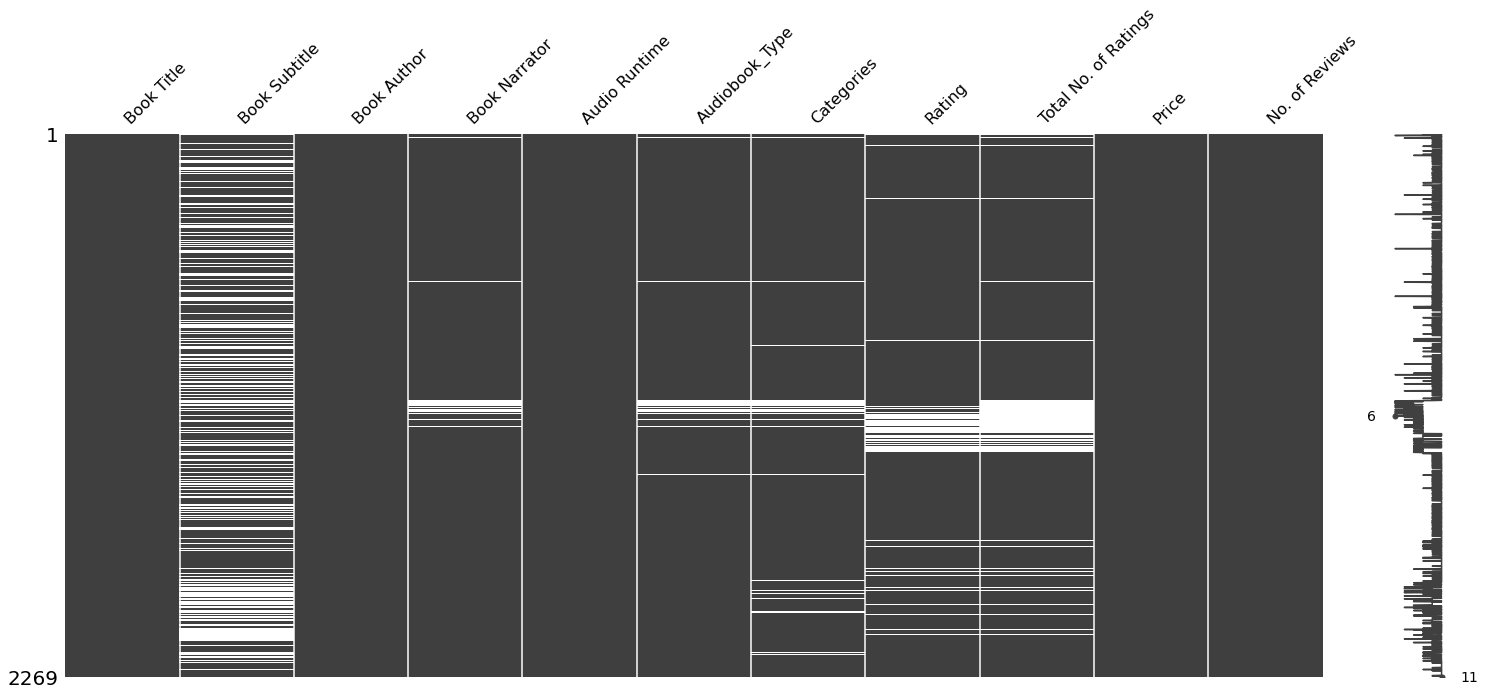

In [137]:
msno.matrix(df_eda)
plt.show()

As we can see, we have NaN in the columns "Book Subtitle", "Book Narrator", "Audiobook_Type", "Categories", "Rating" and "Total No. of Ratings"

## Data cleaning

### Cleaning the columns

### Data types

In [138]:
df_eda.dtypes

Book Title               object
Book Subtitle            object
Book Author              object
Book Narrator            object
Audio Runtime            object
Audiobook_Type           object
Categories               object
Rating                   object
Total No. of Ratings    float64
Price                    object
No. of Reviews            int64
dtype: object

We can see that the data types of most of the entries are object and not int or float for the most one that should be. Let's clean it.

### Rating

Let's what values are in rating.

In [139]:
display(df_eda["Rating"].unique())
print(f'There is {df_eda["Rating"].isna().sum()} NaN values for Ratings')

array(['5', '4.5', nan, '4.8', 'Not rated yet', '4.6', '4.9', '4.7',
       '4.3', '4.2', '4.4', '4', '4.1', '5 out of 5 stars', '3.3', '3.9',
       '3.6', '3.8', '4.5 out of 5 stars', '2.3', '3', '1', '3.5', '2.5',
       '3.2', '1.8', '3.1', '2.8', '2.7', '3.4', '2.2', '2.9',
       '4 out of 5 stars', '3.7', '1.5'], dtype=object)

There is 236 NaN values for Ratings


In [140]:
map_ratings = {
    'Not rated yet': np.NaN,
    '5 out of 5 stars': 5,
    '4.5 out of 5 stars': 4.5,
    '4 out of 5 stars': 4
}

df_eda = df_eda.replace({'Rating': map_ratings})
df_eda = df_eda[df_eda["Rating"].notna()]
df_eda["Rating"] = df_eda["Rating"].astype(float)
df_eda["Rating"].unique()

array([5. , 4.5, 4.8, 4.6, 4.9, 4.7, 4.3, 4.2, 4.4, 4. , 4.1, 3.3, 3.9,
       3.6, 3.8, 2.3, 3. , 1. , 3.5, 2.5, 3.2, 1.8, 3.1, 2.8, 2.7, 3.4,
       2.2, 2.9, 3.7, 1.5])

### Runtime and Price

The runtime and the price are in a non desirable format as strings. Let's create our custom parser and clean them to have proper entries

In [141]:
def clean_runtime(string):
    my_tab = string.split()
    if len(my_tab) == 2:
        minutes = int(my_tab[0])
        return minutes
    elif len(my_tab) == 4:
        minutes = int(my_tab[2])
        return minutes
    elif len(my_tab) == 5:
        hours = int(my_tab[0])
        minutes = int(my_tab[3])
        return hours * 60 + minutes
    else:
        return np.NaN

def clean_price(string):
    return float(string[1:])    

df_eda["Audio Runtime"] = df_eda["Audio Runtime"].apply(lambda s: clean_runtime(s))
df_eda["Price"] = df_eda["Price"].apply(lambda s: clean_price(s))
df_eda.head()

,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,No. of Reviews
0,Bamboozled by Jesus,How God Tricked Me into the Life of My Dreams,Yvonne Orji,Yvonne Orji,391,Unabridged Audiobook,Biographies & Memoirs,5.0,47.0,29.65,12
1,Sixth Realm Part 1,"A LitRPG Fantasy Series (The Ten Realms, Book 6)",Michael Chatfield,Neil Hellegers,813,Unabridged Audiobook,Science Fiction & Fantasy,4.5,98.0,24.95,23
4,The Devil May Dance,A Novel,Jake Tapper,Rob Shapiro,612,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.5,108.0,29.65,12
5,Shadow Storm,"Shadow Rider, Book 6",Christine Feehan,Jim Frangione,822,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.8,124.0,31.49,20
8,Dream Spinner,NaN,Kristen Ashley,Susannah Jones,765,Unabridged Audiobook,Romance,4.6,101.0,29.65,6


### Extra Data Wrangling

We will now add two extra columns, which are the number of books authored by the author of the book, and the number of books narrated by the book narrator

In [150]:
df_eda["No. of book narrated by narrator"] = df_eda.groupby(['Book Narrator'])['Rating'].transform('count')
df_eda["No. of book authored by author"] = df_eda.groupby(['Book Author'])['Rating'].transform('count')
df_eda.head()

,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,No. of Reviews,No. of book narrated by narrator,No. of book authored by author
0,Bamboozled by Jesus,How God Tricked Me into the Life of My Dreams,Yvonne Orji,Yvonne Orji,391,Unabridged Audiobook,Biographies & Memoirs,5.0,47.0,29.65,12,1,1
1,Sixth Realm Part 1,"A LitRPG Fantasy Series (The Ten Realms, Book 6)",Michael Chatfield,Neil Hellegers,813,Unabridged Audiobook,Science Fiction & Fantasy,4.5,98.0,24.95,23,2,2
4,The Devil May Dance,A Novel,Jake Tapper,Rob Shapiro,612,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.5,108.0,29.65,12,1,2
5,Shadow Storm,"Shadow Rider, Book 6",Christine Feehan,Jim Frangione,822,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.8,124.0,31.49,20,2,1
8,Dream Spinner,NaN,Kristen Ashley,Susannah Jones,765,Unabridged Audiobook,Romance,4.6,101.0,29.65,6,2,3


## Data Visualization

We will now Visualize the distribution of our dataset to have a better overview of it.

### Distribution of the continous variables

We'll plot the distribution of each continous variable here.

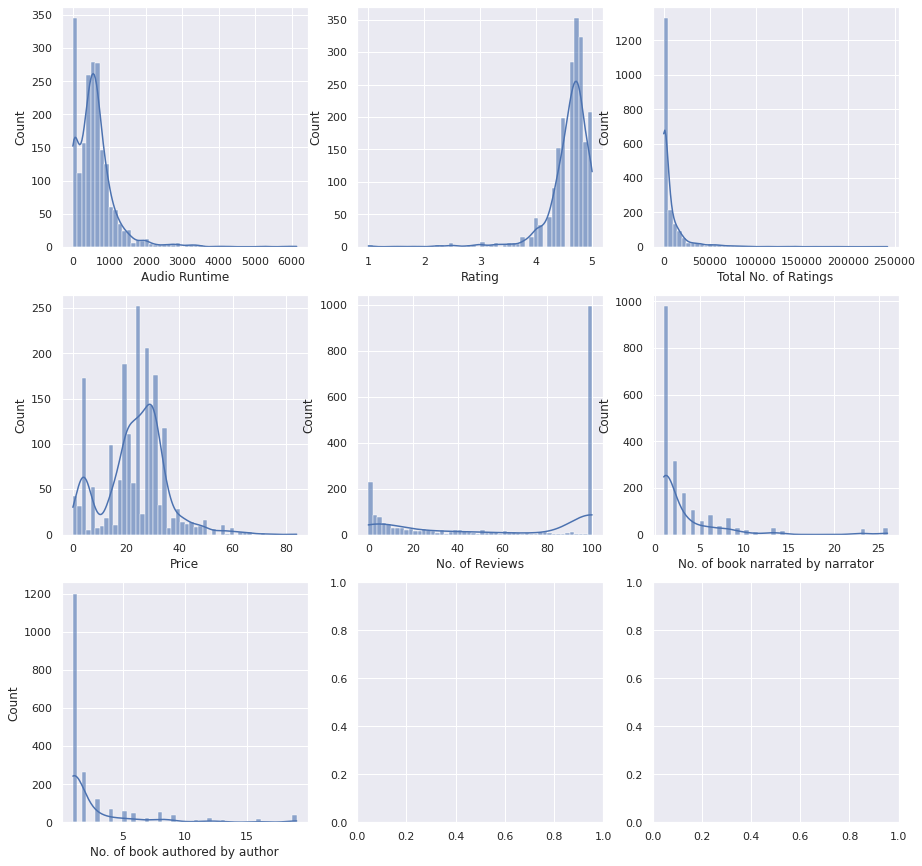

In [179]:
continuous_variables = ["Audio Runtime", "Rating", "Total No. of Ratings", "Price", "No. of Reviews", "No. of book narrated by narrator", "No. of book authored by author"]

fig, axs = plt.subplots(ncols=3, nrows=3, figsize = (15,15))

for idx, variable in enumerate(continuous_variables):
    row = int(idx / 3)
    col = idx % 3
    sns.histplot(df_eda[variable], kde=True, bins=50, alpha=0.6, ax=axs[row, col])

plt.show()

Some observations are:
- The distribution of most of our continous variable is skewed.
- The audio runtime has most values between 0 and 2000 minutes.
- The ratings are mostly between 4 and 5. 
- The price is one of the most fluctuating variable. 

We will now try to see the pairwise correlation between the audio runtime, the rating, the price and the Total No. of Ratings. 

### Pairwise relationships

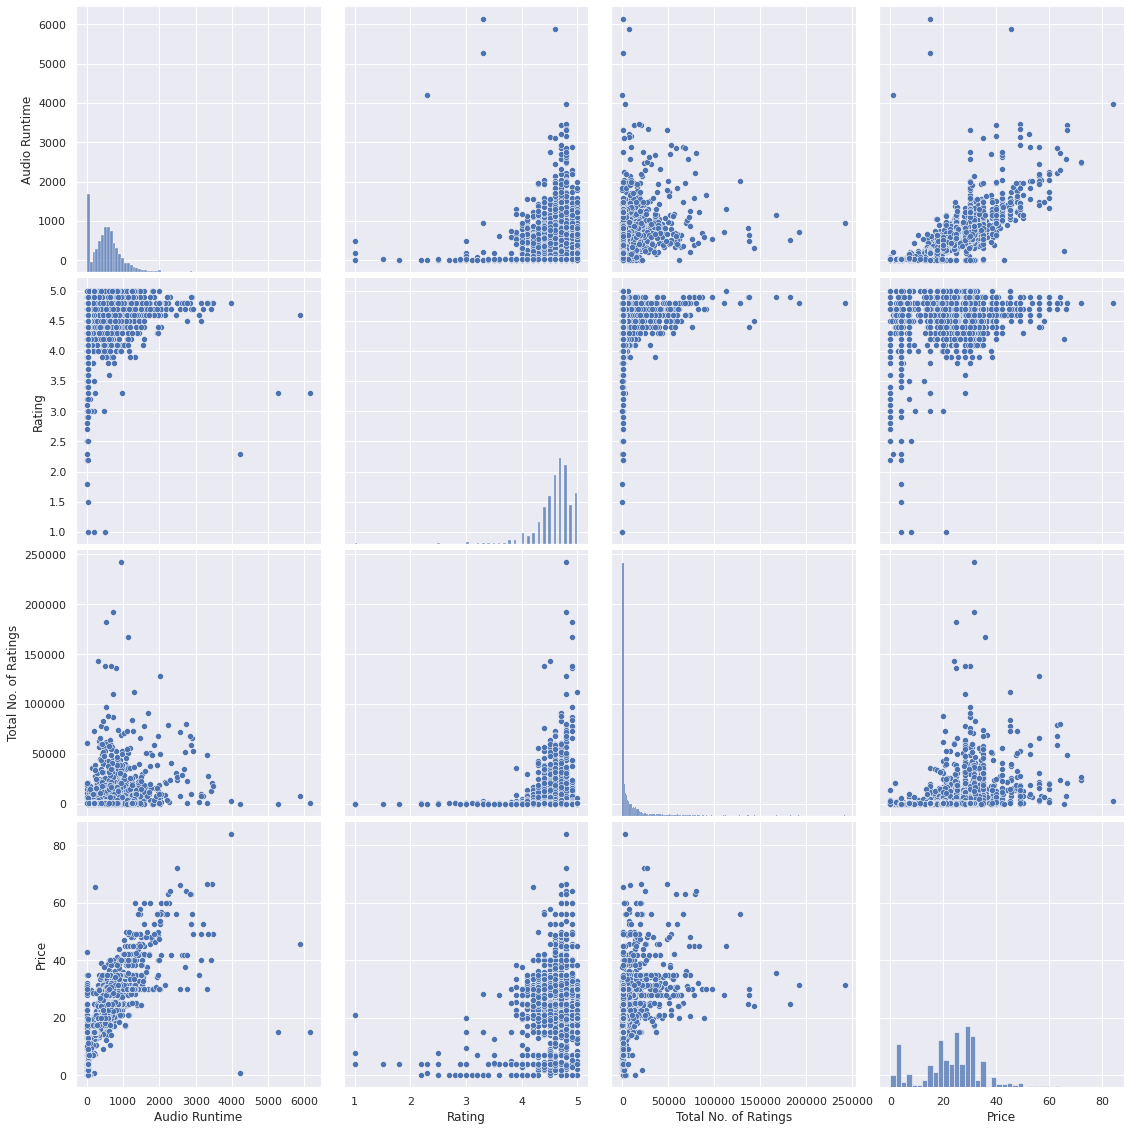

In [182]:
pairwise_cols = ["Audio Runtime", "Rating", "Total No. of Ratings", "Price"]

sns.pairplot(df_eda[pairwise_cols], height=4)
plt.show()

Some observations we can have are:

- There is a clear relation between the audio runtime and the price
- The price and the rating don't seem correlated
- There might be some correlation between the total number of ratings and the price

We will test these observation later. Now, we will focus on the categories.

### Categories visualisation 

We will firstly see how many books are in each categories

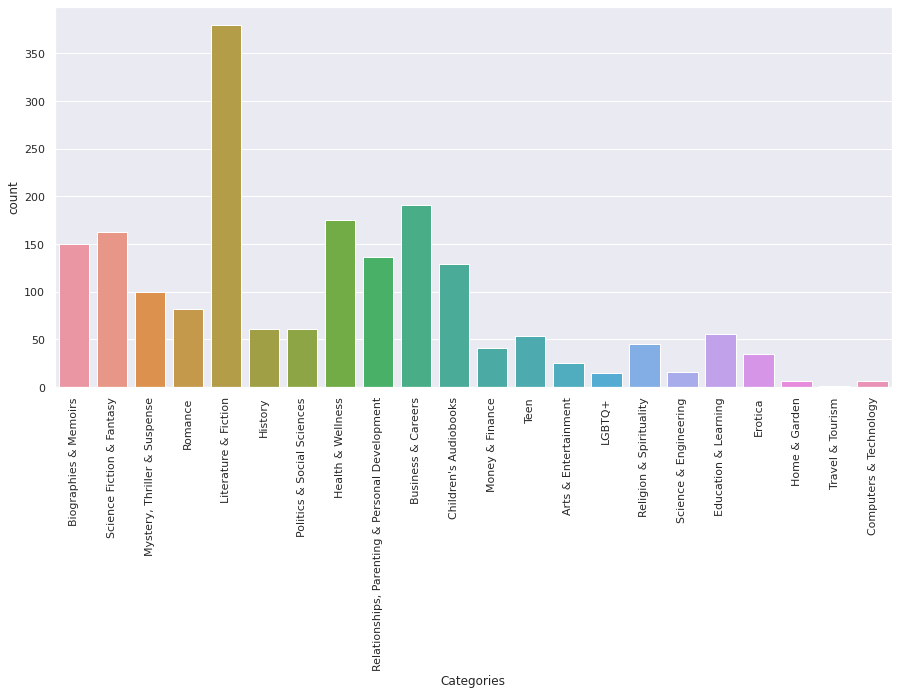

In [216]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.countplot(data=df_eda, x="Categories")
plt.xticks(rotation=90)
plt.show()

In order to have meaningful future plots, let's remove the categories that have under 55.

In [231]:
counts = df_eda['Categories'].value_counts()
df_categories = df_eda.loc[df_eda['Categories'].isin(counts.index[counts > 55])]

Are some categories longer than other ? Let's figure it out with a box plot.

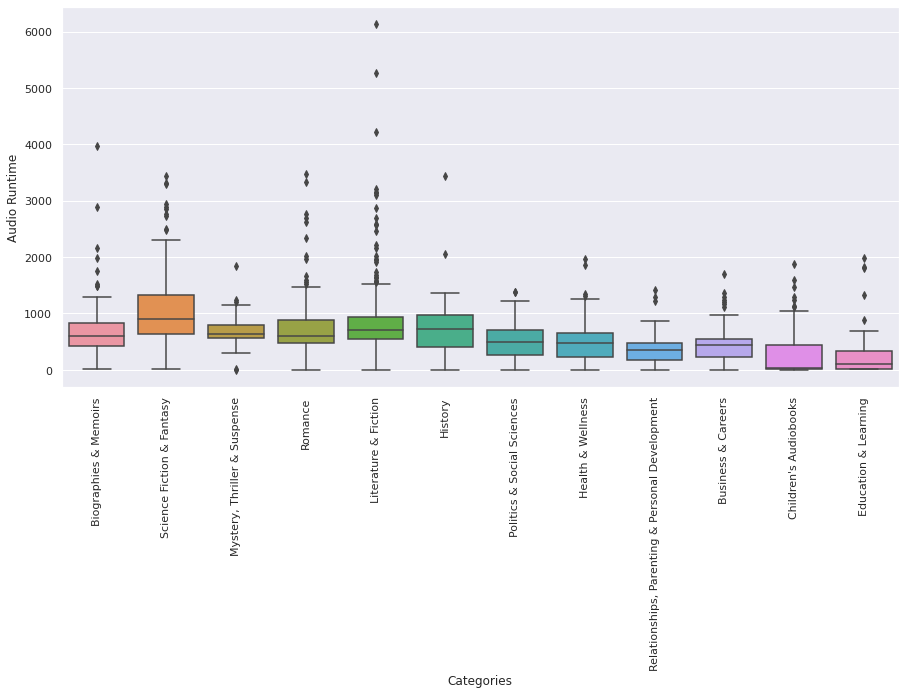

In [236]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.boxplot(data=df_categories, x="Categories", y="Audio Runtime")
plt.xticks(rotation=90)
plt.show()

Some observation we can have are:

- The median runtime of all categories is below 1000 minutes
- The categories with the slowest median runtime are Education & Learning as well as Children's adultbooks
- Fantasy, history and teens are the longest categories

Now, let's observe if there if we can distinguish a relationship between categories, price and ratings

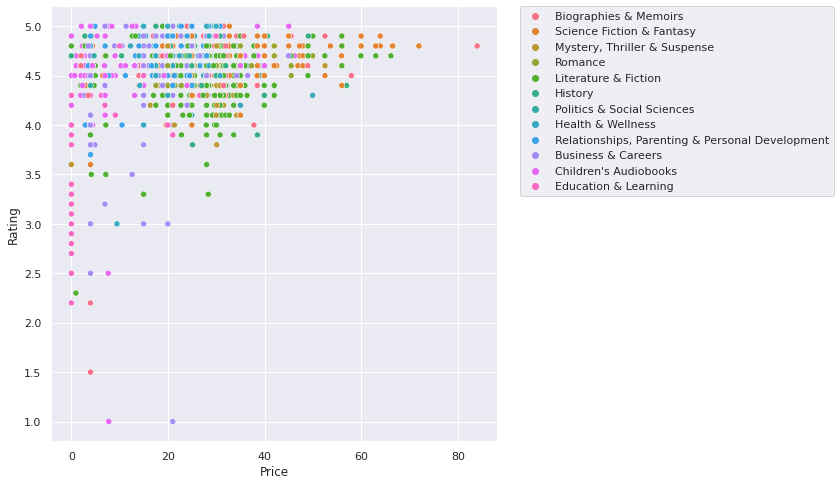

In [233]:
sns.set(rc={'figure.figsize':(8, 8)})
g = sns.scatterplot(data=df_categories, x="Price", y="Rating", hue="Categories")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

This graph is not really helpful, as it contains too much data points. Let's make it more clear by aggregating the values

In [234]:
a = df_categories.groupby("Categories")["Rating"].mean()
b = df_categories.groupby("Categories")["Price"].mean()
df_aggregated = pd.concat([a, b], axis=1).reset_index()

df_aggregated

,Categories,Rating,Price
0,Biographies & Memoirs,4.613333,27.399333
1,Business & Careers,4.542408,20.987120
2,Children's Audiobooks,4.590698,14.543798
3,Education & Learning,4.160714,10.454643
4,Health & Wellness,4.697714,21.704229
5,History,4.639344,26.258361
6,Literature & Fiction,4.514474,28.133632
7,"Mystery, Thriller & Suspense",4.474000,26.826000
8,Politics & Social Sciences,4.765574,20.912459
9,"Relationships, Parenting & Personal Development",4.700735,18.881544


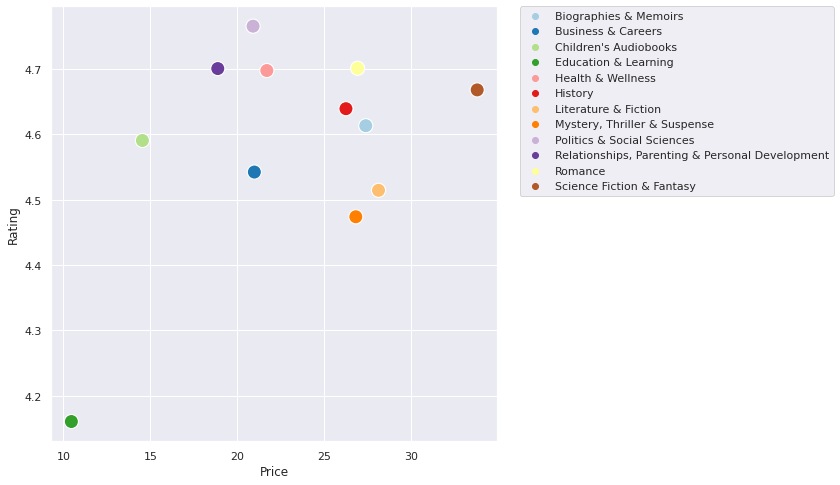

In [235]:
sns.set(rc={'figure.figsize':(8, 8)})
sns.set_palette("Paired", n_colors=29)
g = sns.scatterplot(data=df_aggregated, x="Price", y="Rating", hue="Categories", s=200)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Some observation that we can make are:
- Education & Learning is the cheapest yet lowest rated category
- The category with the average best rating is Politics
- The category with the average highest price is Science Fiction & Fantasy (which make sense, as we have previously seen it is the longest category and we have assumed a positive correlation between audio runtime and price)https://github.com/epfl-ada/2020/blob/master/Tutorials/03%20-%20Describing%20data/Describing_data_solution.ipynb
- You should be careful when buying a Mystery, Thriller & Suspense book - they are expensive but have a relative bad rating
- History and Biographies & Memoir almost have the same rating - maybe they have the same distribution ? 

## Statistics

### Verification of our assumptions

Earlier, we have observed some correlation when watching the data visualization. These were:

- There is a clear relation between the audio runtime and the price
- The price and the rating don't seem correlated
- There might be some correlation between the total number of ratings and the price

Let's now test them.

In [247]:
display(stats.pearsonr(df_eda['Audio Runtime'],df_eda['Price']))
stats.spearmanr(df_eda['Audio Runtime'],df_eda['Price'])

(0.7296074912125204, 0.0)

SpearmanrResult(correlation=0.8131999436469547, pvalue=0.0)

We can see that there is a clear correlation with a p-value < 0.05. Our assumption was correct. Let's plot this correlation in a graph.

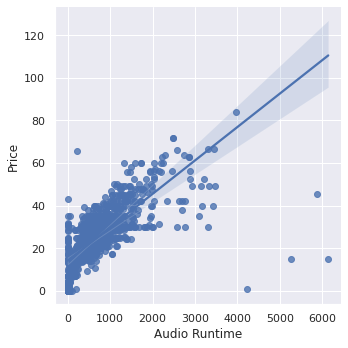

In [242]:
sns.lmplot(data=df_eda, x="Audio Runtime", y="Price")
plt.show()

In [251]:
display(stats.pearsonr(df_eda['Rating'],df_eda['Price']))
stats.spearmanr(df_eda['Rating'],df_eda['Price'])

(0.21293614183281756, 1.1003219621728111e-21)

SpearmanrResult(correlation=0.01533597005318122, pvalue=0.4957740585526491)

In the end, there is a linear correlation between the rating and the price - but not a monotonic relationship.


We have previously seen that the average price of the history books is almost the same as the average price of the Biographies & Memoirs book. We were wondering if there is the same distribution between the price of these two categories. Let's try it out with a ttest - the null hypothesis is that the price is the same between the two categories.

In [250]:
stats.ttest_ind(df_eda.loc[df_eda['Categories'] == 'History']['Rating'], df_eda.loc[df['Categories'] == 'Biographies & Memoirs']['Rating'])

Ttest_indResult(statistic=0.47084809493312996, pvalue=0.6382402630043167)

The p-value is greater than 0.05 -> We can reject the null hypothesis that the price is the same, so our intuition was false.

### Statistics correlation with linear regression

Let's now use the statsmodel API to check the statistical correlation between the continuous variable and the categories compared to the rating.

We will do so by fitting a linear regression (ordinary least squares model) on our data with the rating as a target, then check the coef along with the p-value

In [260]:
mod = smf.ols(formula='Rating ~ C(Categories) + Q("Audio Runtime") + Q("Total No. of Ratings") +\
                        Q("Total No. of Ratings") + Q("Price") + Q("No. of Reviews") + \
                        Q("No. of book narrated by narrator") + Q("No. of book authored by author")', data=df_eda)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     14.03
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           2.13e-57
Time:                        14:46:12   Log-Likelihood:                -741.24
No. Observations:                1928   AIC:                             1538.
Df Residuals:                    1900   BIC:                             1694.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------